In [1]:
import pandas
import networkx

import matplotlib.pyplot as plt

from operator import itemgetter

In [3]:
graph_as_pdf = pandas.read_csv("./datasets/processed/enron_graph.tsv", sep="\t")
graph_as_pdf.groupby(by=["source", "target"]).count().reset_index()

,source,target,weight
0,andrea.ring@enron.com,michael.mousteiko@enron.com,1
1,bill.rapp@enron.com,jeanette.doll@enron.com,1
2,bill.rapp@enron.com,kevin.hyatt@enron.com,1
3,bill.rapp@enron.com,michelle.lokay@enron.com,1
4,bill.rapp@enron.com,teb.lokey@enron.com,1
5,brad.mckay@enron.com,8888915473@archwireless.net,1
6,brant.reves@enron.com,gerald.nemec@enron.com,1
7,brant.reves@enron.com,ragan.bond@enron.com,1
8,brant.reves@enron.com,trevor.mihalik@enron.com,1
9,brian.redmond@enron.com,barry.tycholiz@enron.com,1


In [4]:
# let's create a graph object 
# actually it should be a DiGraph object
eg = networkx.Graph()
for _, row in graph_as_pdf.iterrows():
    eg.add_edge(u=row["source"], v=row["target"], weight=row["weight"])

In [5]:
# decending degree sequence of nodes of the graph
degree_sequence = sorted((d for n, d in eg.degree()), reverse=True)
degree_sequence[0:10]

[151, 105, 98, 49, 27, 18, 17, 17, 16, 10]

In [5]:
# max degree of the nodes
dmax = max(degree_sequence)

In [8]:
# get the greatest connexted component
gcc = sorted(networkx.connected_component_subgraphs(eg), key = len, reverse=True)[0]
len(gcc.nodes()), len(eg.nodes())

(526, 607)

In [9]:
pos = networkx.spring_layout(gcc)

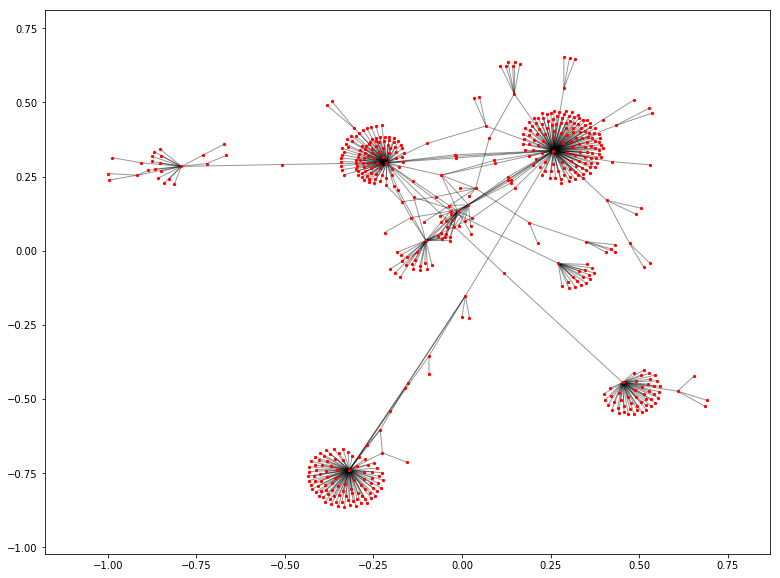

In [12]:
# let's draw the gcc
plt.figure(figsize=(13, 10))
networkx.draw_networkx_nodes(gcc, pos, node_size=5)
networkx.draw_networkx_edges(gcc, pos, alpha=0.4)
plt.show()

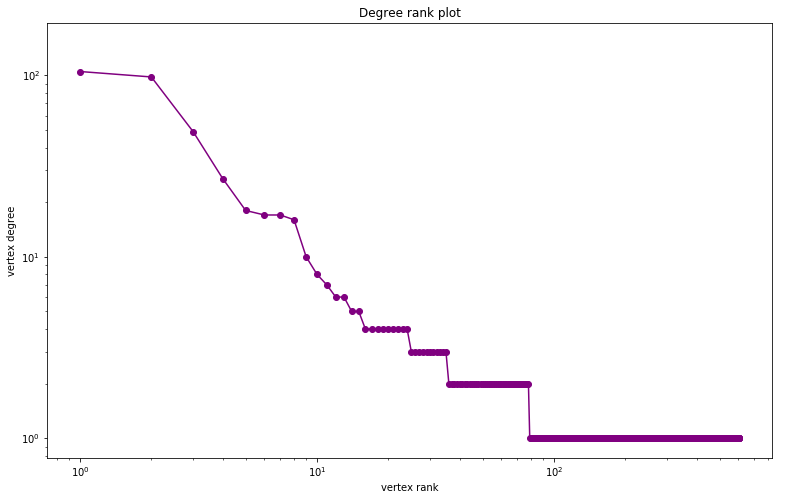

In [13]:
plt.figure(figsize=(13, 8))
plt.loglog(degree_sequence,'purple', marker='o')
plt.title("Degree rank plot")
plt.ylabel("vertex degree")
plt.xlabel("vertex rank")
plt.axes([0.45, 0.45, 0.45, 0.45])
plt.axis('off')
plt.show()

In [16]:
# dictionary containing each node and its degree
node_and_degree = dict(eg.degree())

In [17]:
# get the node with greatest degree
largest_hub, degree = sorted(node_and_degree.items(), key=itemgetter(1))[-1]

In [18]:
hub_ego_net = networkx.ego_graph(eg, largest_hub)

In [19]:
pos = networkx.spring_layout(hub_ego_net)

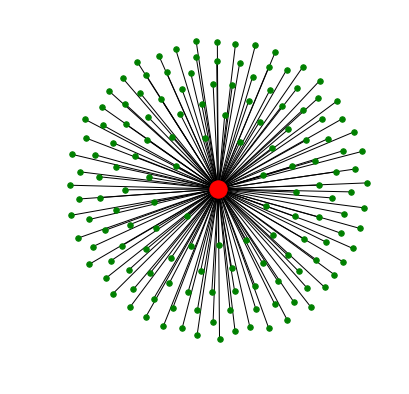

In [14]:
plt.figure(figsize=(5, 5))
networkx.draw(hub_ego_net, pos, node_color='green', node_size=30, with_labels=False)
networkx.draw_networkx_nodes(hub_ego_net, pos, nodelist=[largest_hub], node_size=300, node_color='red')
plt.show()

In [21]:
sorted(networkx.clustering(eg).items(), key=itemgetter(1))[-1]

('rogers.herndon@enron.com', 1.0)

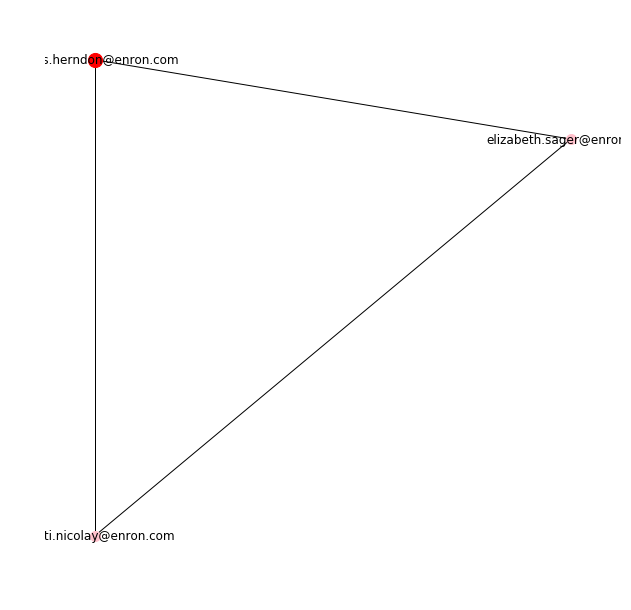

In [16]:
hub_ego_net = networkx.ego_graph(eg, "rogers.herndon@enron.com")
pos = networkx.spectral_layout(hub_ego_net)

plt.figure(figsize=(8, 8))
networkx.draw(hub_ego_net, pos, node_color='pink', node_size=100, with_labels=True)
networkx.draw_networkx_nodes(hub_ego_net, pos, nodelist=["rogers.herndon@enron.com"], 
                             node_size=200, node_color='red')
plt.show()

In [22]:
shortest_path = networkx.shortest_path(eg, "victor.lamadrid@enron.com", "james.steffes@enron.com")

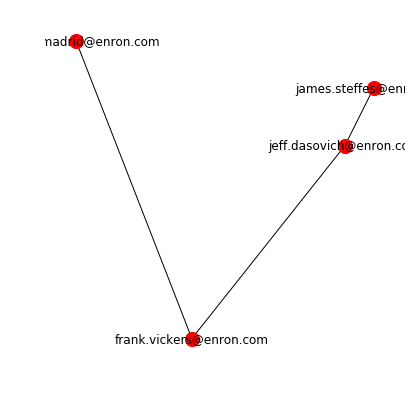

In [18]:
path = networkx.subgraph(eg, nbunch=shortest_path)
pos = networkx.spectral_layout(path)

plt.figure(figsize=(5, 5))
networkx.draw(path, pos, nodelist=path,  with_labels=True,
                             node_size=200, node_color='red')
plt.show()

In [24]:
communities = []
for community in networkx.community.girvan_newman(eg):
    communities.append(community)

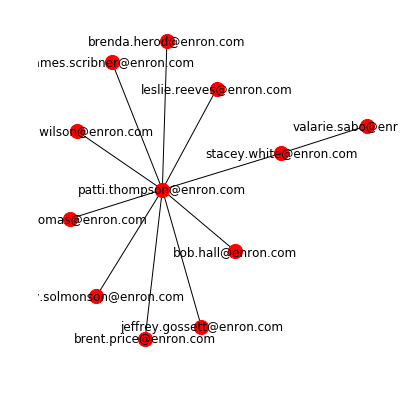

In [25]:
step = 0
comms = communities[step]

ck = [community for community in comms if len(community) > 10 and len(community) < 20]

comm = networkx.subgraph(eg, nbunch=ck[0])
pos = networkx.spring_layout(comm)

plt.figure(figsize=(5, 5))
networkx.draw(comm, pos, node_color='red', node_size=200, with_labels=True)
plt.show()